In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy.optimize import curve_fit 
from ipywidgets import interactive
from scipy.integrate import quad

# Background of the Fourier Series

The Fourier Series gets its name from the French mathmatician Joseph Fourier (1768-1830), whose attempt to solve a problem in heat conduction required him to express a function as an infinite series of sine and cosine functions:

$$f(x) = a_0+\sum_{n=1}^{\infty}{(a_n\cos(nx)+b_n\sin(nx))}$$

This trigonmetric series had been investigated before by other mathmaticians such as Daniel Bernoulli and Leonard Euler as part of their investigations in astronomy and the vibration of strings but Jospeh Fourier's observations that some discontinous functions could be expressed as an infinite sum was a breakthrough in this area of mathmatics$^2$.

# What Is A Fourier Series?

A Fourier series is an expansion of a periodic function f(x) in terms of an infinite sum of sines and cosines. Fourier series make use of the orthogonality relationships of the sine and cosine functions. The computation and study of Fourier series is known as harmonic analysis and is an extremely useful way to break up an arbitrary periodic function into a set of simple terms that can be plugged in, solved individually, and then recombined to obtain the solution to an original problem or an approximation to whatever accuracy is desired or practical$^1$. 

## Deriving the Frequency Domain Representation of the Fourier Series

The Fourier Series is more easily understood when it is broken down into even and odd functions before attempting to generalize the function.

An even function can be expressed as the sum of cosines of various frrequencies via the equation
$$f_{even}(t) = a_0 + \sum_{n=1}^{\infty}{a_n\cos(n\omega_0t)} $$
This is commonly called the synthesis equation since it shows how the function f(t) can be created by adding up the cosines.
In order to find the magnitude of $a_n$, Both sides of this equation are multiplied by $\cos(m\omega_0t)$ (without justification) and integrated over one period T.
$$\int_{T} f_{even}(t)\cos(m\omega_0t)dt = \int_{T} a_0 + \sum_{n=1}^{\infty}{a_n\cos(n\omega_0t)}$$
Now switching the order of summation and integration on the right hand side, followed by an application of the trig identity $cos(a)cos(b)=½(cos(a+b)+cos(a-b))$ yields the equation
$$\int_{T} f_{even}(t)\cos(m\omega_0t)dt = \frac{1}{2} \sum_{n=0}^{\infty}\int_{T}{a_n\cos((n+m)\omega_0t)+cos((m-n)\omega_0t)dt}$$
for the sake of simplicity, considering cases where $m>=0$, then the function $\cos((m+n)ω0t)$ has exactly $(m+n)$ complete oscillations in the interval of integration, T. When we integrate this function, the result is zero (because we are integrating over an an integer (greater than or equal to one) number of oscillations). This simplifies our result to
$$\int_{T} f_{even}(t)\cos(m\omega_0t)dt = \frac{1}{2} \sum_{n=0}^{\infty}\int_{T}{a_n\cos((m-n)\omega_0t)dt}$$
Because this function is even, varies over time, and has exactly $|m-n|$ oscillations in the interval of integration except when $m=n$ in which case $\cos(0)=1$.
Upon taking a second look at the summation, we can see that as n goes from 0 to infinity, the only term that contributes to the summation is when $m=n$ when the integral equals T and thus the entire summation can be simplified to: 
$$\int_{T} f_{even}(t)\cos(m\omega_0t)dt = \frac{1}{2} a_nT$$
$$a_n = \frac{2}{T} \int_{T} f_{even}(t)\cos(m\omega_0t)dt$$
$$a_m = \frac{2}{T} \int_{T} f_{even}(t)\cos(n\omega_0t)dt$$
For the special case where $m=0$:
$$a_0T = \int_{T} f_{even}(t)dt$$
$$a_0 = \frac{1}{T}\int_{T} f_{even}(t)dt$$
Which leads us to the conclusion that $a_0$ is the average value of the function.

An odd function can be represented by a fourier sine series
$$f_{odd}(t) = \sum_{n=1}^{\infty}{b_n\sin(n\omega_0t)} $$
Note that for odd functions, there can be no $b_0$ term expressing average since the average of an odd function over a single period is always zero.

The dervation closely follows that of even function, resulting in $b_n$ equaling
$$b_n = \frac{2}{T} \int_{T} f_{odd}(t)\sin(n\omega_0t)dt$$


# Example Using A Data Set

Given the following equation and dataset as an example, we can try and see if the equations above can give us a value for $a_1, a_2, a_3,$ and $a_4$.
$$V(t)=a_1\sin(\omega t)+a_2\sin(2\omega t)+a_3\sin(3\omega t)+a_4\sin(4\omega t)$$

In [2]:
file = pd.read_table('dataset.txt')
file.head()

,t (s),V (volts)
0,0.000000,0.00000
1,0.000005,0.02044
2,0.000010,0.04088
3,0.000015,0.06130
4,0.000020,0.08171


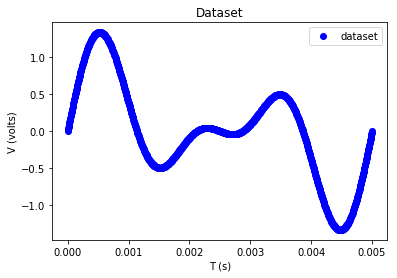

In [3]:
time = file['t (s)']
volts = file['V (volts)']


plt.figure()
plt.title('Dataset')
plt.xlabel('T (s)')
plt.ylabel('V (volts)')
plt.plot(time, volts, 'bo', label='dataset') 
plt.legend()
plt.show()

So let's try using the equation for finding the coefficent of an odd function to get values for our coefficients.

In [7]:
### I wanted to use the slider here to change the value of n but I couldn't get it to work ###
def integrand(T, n, omega):
    return np.sin(n*omega*T)
T=.005
n=1 ## By changing this value we can solve for a1, a2, etc.
omega=2*np.pi/T
int1=quad(integrand,0,.005,args=(n,omega)) # scipy.integrate.quad(function, lower_bound, upper_bound, arguments)
coefficient=(2/T)*int1[0]*10**15

print(coefficient)

    

0.020319066434007778


The value that is printed above gets placed in the p0 (parameters) array and once we get values for $a1,a2,a3$,and $a4$, we can run a curve fit and test to see how close we got.

In [8]:
def series(t, a1 , a2, a3, a4, omega):
    return a1*np.sin(omega*t)+a2*np.sin(2*omega*t)+a3*np.sin(3*omega*t)+a4*np.sin(4*omega*t)

x1 = np.linspace(0,0.005,100)
p0 =[.029,-.0194,.132,.476,2*np.pi/.005] #holds the parameters that we solved for in the above code cell.
parameters, test = curve_fit(series, time, volts, maxfev=10000, p0=p0)

model = series(time, *parameters)

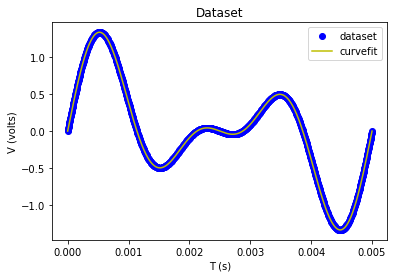

In [9]:
plt.figure()
plt.title('Dataset')
plt.xlabel('T (s)')
plt.ylabel('V (volts)')
plt.plot(time, volts, 'bo', label='dataset')
plt.plot(time, model,'y', label='curvefit') 
plt.legend()
plt.show()

As you can see, the curve fit is nice and snug within the shape of the original dataset.

# Equating the Trigonometric and Exponential Series

In order to determine the relationship of $c_n$ to $a_n$ and $b_n$, we can set the two functions equal to each other.
$$a_0+\sum_{n=1}^{\infty}{(a_n\cos(nx)+b_n\sin(nx))}=\sum_{n=-\infty}^{\infty} c_ne^{in\omega_0t}$$

If we only consider the parts of the signal that oscillate some number of times in a single period T, then we can see that:
$$a_n\cos(nx)+b_n\sin(nx)= c_{-n}e^{-in\omega_0t}+c_{n}e^{in\omega_0t}$$

Since the left hand side of this equation is real, the right side of the equation must also be real. We can reconcile this due to the fact that $e^{-in\omega_0t}$ is the complex conjugate of $e^{in\omega_0t}$ so $c_{-n}$ must be the complex conjugate of $c_n$ and thus the imaginary parts of the equation will cancel out when added together. Using Euler's identites for sine and cosine, we can expand the right hand side of the equation to:
$$a_n\cos(nx)+b_n\sin(nx)=(c_{nreal}-ic_{nimaginary})(\cos(n\omega_0t)-i\sin(n\omega_0t))+(c_{nreal}+ic_{nimaginary})(\cos(n\omega_0t)+i\sin(n\omega_0t))$$
$$=2c_{nreal}\cos(n\omega_0t)-2c_{nimaginary}\sin(n\omega_0t)$$

When we equate the magnitude of the sine and cosine terms we end up with: 
$$c_n=\frac{a_n}{2}-i\frac{b_n}{2}, n\neq0$$

In [ ]:
# This space was supposed to see if using the complex fourier series would produce the same result as the trigonometric
# series but I was having some trouble with the math portion and I ran out of time.

# Bibliography

1. Cheever, Erik, and Swarthmore College. “Derivation of Fourier Series.” Fourier Series Examples, lpsa.swarthmore.edu/Fourier/Series/DerFS.html.
2. Bhatia, Rajendra. Fourier Series. Mathematical Association of America, 2005.